In [1]:
import numpy as np
import porepy as pp
import scipy.sparse as sps
import math 
import sys
sys.path.append("../class")
from Flow_class import Flow
from Transport_class import Transport
from Reaction_class import Reaction
from Concentrations import Concentrations

In [2]:
Nx=100
Ny=5
Nt=10000

In [3]:
#gb= pp.grid_buckets_2d.single_vertical([Nx, Ny], y_endpoints=[0.6, 0.2], simplex=False)
#gb, domain = pp.grid_buckets_2d.single_horizontal([Nx, Ny], x_endpoints=[0.2, 0.8], simplex=False)
#print(domain)
#pp.plot_grid(gb,figsize=[15,12])
#domain={'xmin': 0, 'xmax': 1, 'ymin': 0, 'ymax': 1}




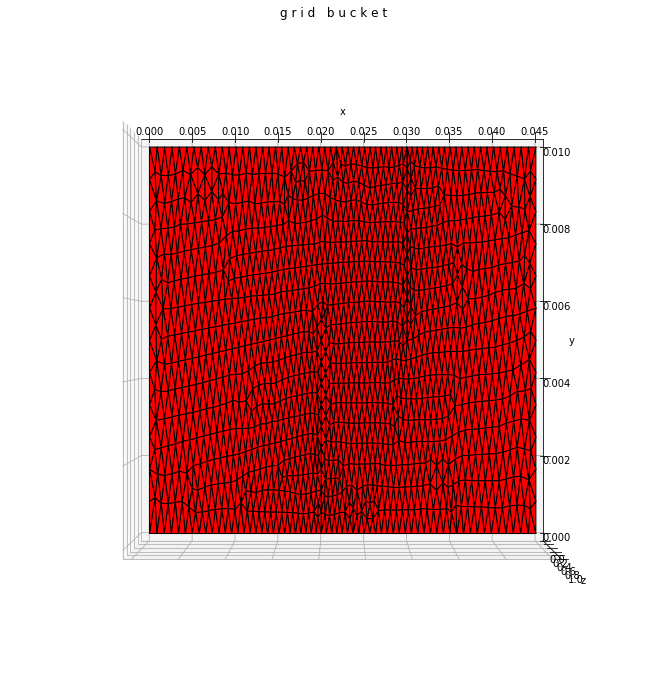

In [4]:
# Point coordinates, as a 2xn array
p = np.array([[0.02,0.02,0.03,0.03], [0,0.005,0.005,0.01]])
# Point connections as a 2 x num_frac arary
e = np.array([[0, 2], [1, 3]])

# The domain contains two fractures: The first from (0, 0) - (2,0), the second (1, 0) to (1, 1)
# Set domain boundaries
domain = {'xmin': 0, 'xmax': 0.045, 'ymin': 0, 'ymax': 0.01}

# Define a fracture network in 2d
network_2d = pp.FractureNetwork2d(p, e, domain)

# Set preferred mesh size close to the fracture, and at the boundary (essentially this is a far-field value)
#mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}
mesh_args = {'mesh_size_frac': 0.0006, 'mesh_size_bound': 0.0009}


# Generate a mixed-dimensional mesh
gb = network_2d.mesh(mesh_args)
pp.plot_grid(gb,figsize=(15,12))

In [5]:
parameter={"aperture":1e-3,
           "fracture_perm":0.00001,
          #"fracture_perm_2":1e5,
           #"fracture_perm":1e5,
          #"fracture_perm":0.001,
           "perm":0.3,
           #"perm":1,
          
          #"f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "f_lambda":lambda x,y,z:0.0,
          "bc_value":[5.0e-9,0.0],
           #"bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

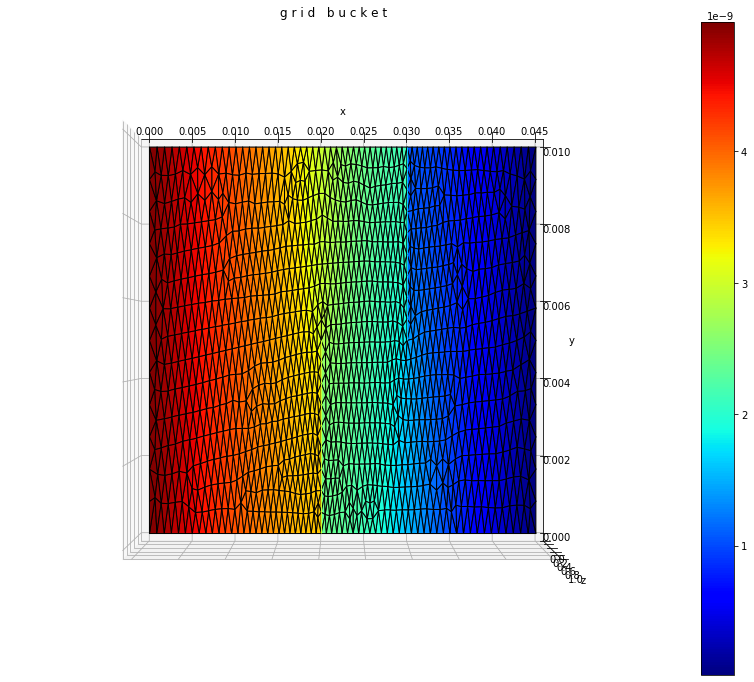

In [6]:
flow=Flow(gb,domain,parameter)
#flow.add_data()
flow.set_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [7]:
parameter={
    "aperture":1e-3,
    "por":0.3,
    "por_frac":0.00001,
    #"por":1.0,
    #"por_frac":1.0,
    #"time_step":1 / 60,
    "time_step":34.56,
    #"time_step":0.001,
    #"t_max":1 /3,
    "t_max":345600,
    #"t_max":0.1,
    "initial_cond":lambda x,y,z:0.0}

transport=Transport(gb,domain,parameter)

In [8]:
porosity=0.3

In [9]:
reaction_data={"kd":1.83e-7,
               #"kd":0.0,
               "K_eq":4.45e-7,
               "K_sol":10e9,
               "porosity":porosity 
              }
reaction=Reaction(reaction_data)
#reaction.set_const_rate()
#print(reaction.const_rate)

In [10]:
K_eq=reaction.data["K_eq"]

In [11]:
bc_type_Ca=["dir","dir"]
bc_value_Ca=[0.0,0.0]
#init_cond_Ca=lambda x,y,z:int(x<0.5)
init_cond_Ca=lambda x,y,z:0.0

bc_type_CaSiO3=["dir","dir"]
bc_value_CaSiO3=[0.0,0.0]
#init_cond_CaSiO3=lambda x,y,z:int(x<0.5)
init_cond_CaSiO3=lambda x,y,z:1.0
#init_cond_CaSiO3=lambda x,y,z:16.7504


bc_type_CO2=["dir","dir"]
bc_value_CO2=[0.3691108,0.0]
#init_cond_Ca=lambda x,y,z:int(x<0.5)
init_cond_CO2=lambda x,y,z:1.0e-3

bc_type_SiO2=["dir","dir"]
bc_value_SiO2=[0.0,0.0]
#init_cond_Ca=lambda x,y,z:int(x<0.5)
init_cond_SiO2=lambda x,y,z:0.0

bc_type_H_piu=["dir","dir"]
bc_value_H_piu=[1.0e-5,0.0]
#bc_value_H_piu=[0.0,0.0]

#init_cond_Ca=lambda x,y,z:int(x<0.5)
init_cond_H_piu=lambda x,y,z:1.0e-7
#init_cond_H_piu=lambda x,y,z:0.0



bc_HCO3_in=K_eq*bc_value_CO2[0]/bc_value_H_piu[0]
#bc_HCO3_in=0.0
print("bc_HCO3_in=")
print(bc_HCO3_in)
#bc_HCO3_out=K_eq*bc_value_CO2[1]/bc_value_H_piu[1]
bc_HCO3_out=0.0

bc_type_HCO3=["dir","dir"]
bc_value_HCO3=[bc_HCO3_in,bc_HCO3_out]
#init_cond_Ca=lambda x,y,z:int(x<0.5)
init_cond_HCO3=lambda x,y,z:0.0

bc_HCO3_in=
0.0164254306


In [12]:
data_6reagents = {"bc_type_Ca": bc_type_Ca,
            "bc_value_Ca": bc_value_Ca,
            "bc_type_CO2": bc_type_CO2,
            "bc_value_CO2": bc_value_CO2,
            "bc_type_HCO3": bc_type_HCO3,
            "bc_value_HCO3": bc_value_HCO3,
            "bc_type_CaSiO3": bc_type_CaSiO3,
            "bc_value_CaSiO3": bc_value_CaSiO3,
            "bc_type_SiO2": bc_type_SiO2,
            "bc_value_SiO2": bc_value_SiO2,
            "bc_type_H_piu": bc_type_H_piu,
            "bc_value_H_piu": bc_value_H_piu,
            "time_step": 34.56,
            "t_max": 345600,
            "method": "Implicit",
            "lambda_lin_decay":0,
            "init_cond_Ca":init_cond_Ca,
            "init_cond_CO2":init_cond_CO2,
            "init_cond_CaSiO3":init_cond_CaSiO3,
            "init_cond_SiO2":init_cond_SiO2,
            "init_cond_HCO3":init_cond_HCO3,
            "init_cond_H_piu":init_cond_H_piu,}

In [13]:
concentrations=Concentrations(gb,Nt,data_6reagents)

In [14]:
bc_psi1,bc_psi2,bc_psi3,bc_psi4,bc_psi5=concentrations.set_bc_psi()

In [15]:
key1="psi1"
key2="psi2"
key3="psi3"
key4="psi4"
key5="psi5"

In [16]:
transport.set_data(bc_psi1,bc_type_Ca,key1)
transport.get_flux(key1)
transport.discretize(key1)
lhs_psi1,rhs_b_psi1,rhs_mass_psi1,assembler_psi1=transport.get_transport_lhs_rhs(key1)
#ciao?1

transport.set_data(bc_psi2,bc_type_Ca,key2)
transport.get_flux(key2)
transport.discretize(key2)
lhs_psi2,rhs_b_psi2,rhs_mass_psi2,assembler_psi2=transport.get_transport_lhs_rhs(key2)

transport.set_data(bc_psi3,bc_type_Ca,key3)
transport.get_flux(key3)
transport.discretize(key3)
lhs_psi3,rhs_b_psi3,rhs_mass_psi3,assembler_psi3=transport.get_transport_lhs_rhs(key3)

transport.set_data(bc_psi5,bc_type_Ca,key5)
transport.get_flux(key5)
transport.discretize(key5)
lhs_psi5,rhs_b_psi5,rhs_mass_psi5,assembler_psi5=transport.get_transport_lhs_rhs(key5)

In [17]:
for g,d in gb:
    #print(d[pp.PARAMETERS][key5]["darcy_flux"])
    print(d[pp.STATE])

{'pressure': array([3.03749649e-09, 8.89274767e-10, 4.87908103e-09, ...,
       3.30793070e-09, 2.05156425e-09, 3.96505455e-09]), 'dimension': array([2., 2., 2., ..., 2., 2., 2.])}
{'pressure': array([2.93889352e-09, 2.93940354e-09, 2.93832209e-09, 2.93834947e-09,
       2.93899097e-09, 2.94089226e-09, 2.94277293e-09, 2.94474464e-09,
       2.94621667e-09]), 'dimension': array([1., 1., 1., 1., 1., 1., 1., 1., 1.])}
{'pressure': array([1.57759937e-09, 1.58435835e-09, 1.59059383e-09, 1.59430022e-09,
       1.59649070e-09, 1.59775816e-09, 1.59673022e-09, 1.59873989e-09,
       1.60026131e-09]), 'dimension': array([1., 1., 1., 1., 1., 1., 1., 1., 1.])}


/home/dell/anaconda3/lib/python3.8/site-packages/porepy/viz/plot_grid.py:127: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


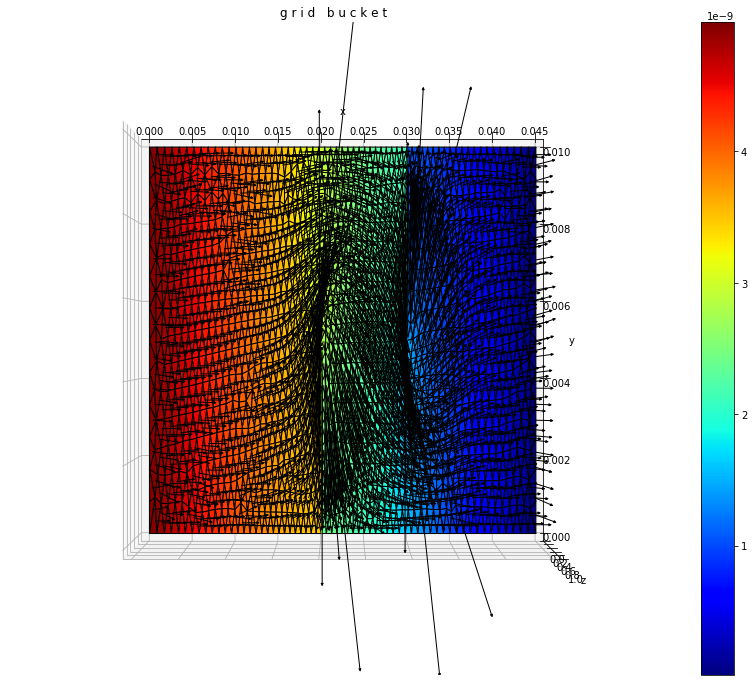

In [18]:
## to export the flux
key=key1
flux='darcy_flux'
mortar='mortar_flux'
flux_P0="P0_flux"

discr_P0_flux = pp.MVEM(key)
for g, d in gb:
    discr_P0_flux.discretize(g, d)
    d[pp.STATE][flux] = d[pp.PARAMETERS][key][flux]

## construct the P0 flux reconstruction
pp.project_flux(gb, discr_P0_flux, flux, flux_P0, mortar)

    
for g,d in gb:
    d[pp.STATE]["P0_flux"]*=100000
pp.plot_grid(gb,"pressure","P0_flux",figsize=(15,12))

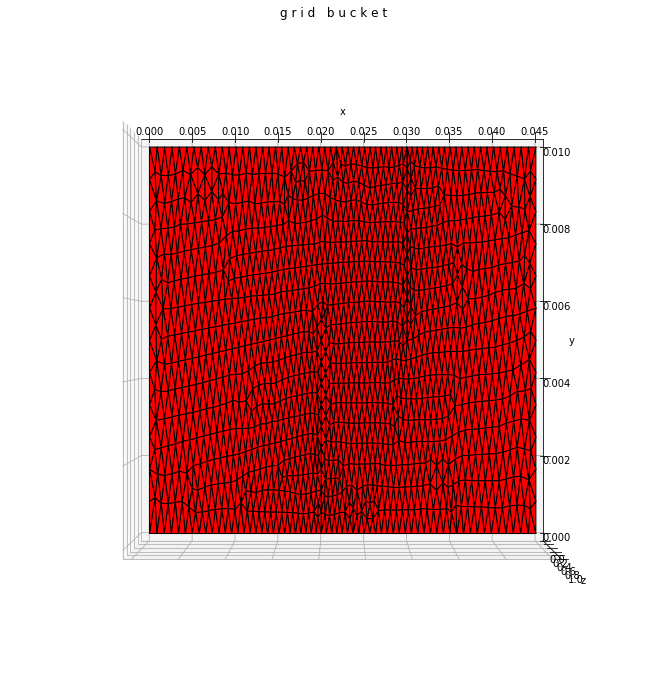

In [19]:
# Point coordinates, as a 2xn array
p = np.array([[0.02,0.02,0.03,0.03], [0,0.005,0.005,0.01]])
# Point connections as a 2 x num_frac arary
e = np.array([[0, 2], [1, 3]])

# The domain contains two fractures: The first from (0, 0) - (2,0), the second (1, 0) to (1, 1)
# Set domain boundaries
domain = {'xmin': 0, 'xmax': 0.045, 'ymin': 0, 'ymax': 0.01}

# Define a fracture network in 2d
network_2d = pp.FractureNetwork2d(p, e, domain)

# Set preferred mesh size close to the fracture, and at the boundary (essentially this is a far-field value)
#mesh_args = {'mesh_size_frac': 0.002, 'mesh_size_bound': 0.003}
mesh_args = {'mesh_size_frac': 0.0006, 'mesh_size_bound': 0.0009}


# Generate a mixed-dimensional mesh
gb1= network_2d.mesh(mesh_args)
pp.plot_grid(gb,figsize=(15,12))

In [20]:
parameter={"aperture":1e-3,
           "fracture_perm":0.00001,
          #"fracture_perm_2":1e5,
           #"fracture_perm":1e5,
           #"fracture_perm":1.0,
           "perm":0.3,
           #"perm":1.0,
           #"f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "f_lambda":lambda x,y,z:0.0,
          #"bc_value":[3.0e-7,0.0],
          "bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

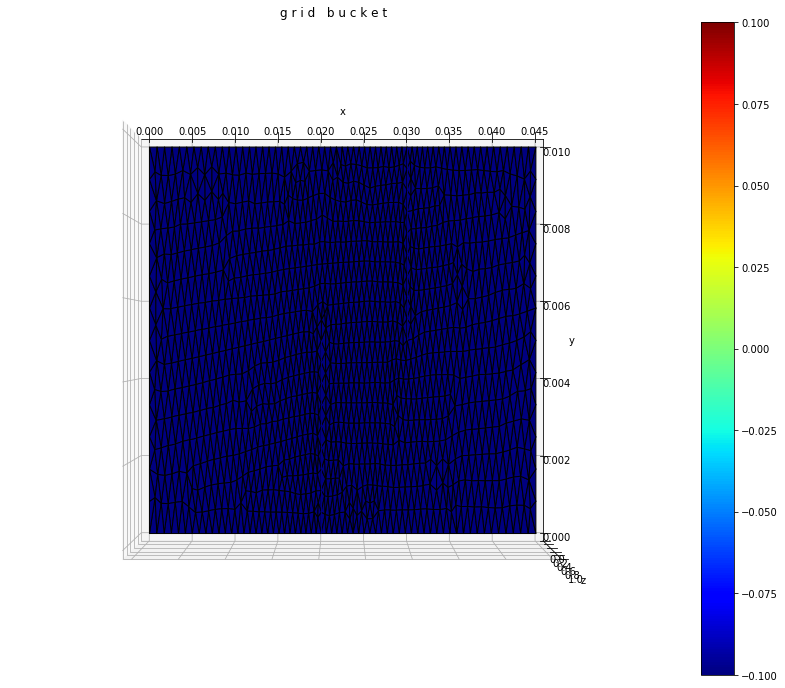

In [21]:
flow=Flow(gb1,domain,parameter)
#flow.add_data()
flow.set_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [22]:
parameter={
    "aperture":1e-3,
    "por":0.3,
    "por_frac":0.00001,
    #"por":1.0,
    #"por_frac":1.0,
    #"time_step":1 / 60,
    "time_step":34.56,
    #"time_step":0.001,
    #"t_max":1 /3,
    "t_max":345600,
    #"t_max":0.1,
    "initial_cond":lambda x,y,z:0.0}

transport_psi4=Transport(gb1,domain,parameter)

In [23]:
transport_psi4.set_data(bc_psi4,bc_type_Ca,key4)
transport_psi4.get_flux(key4)   
transport_psi4.discretize(key4)
lhs_psi4,rhs_b_psi4,rhs_mass_psi4,assembler_psi4=transport_psi4.get_transport_lhs_rhs(key4)

In [24]:
save_every = 100
n_steps = int(np.round(parameter["t_max"] / parameter["time_step"]))
dt=parameter["time_step"]

# Initial condition
psi1 = np.zeros(rhs_b_psi1.size)
assembler_psi1.distribute_variable(
    psi1, variable_names=[key1,transport.mortar_variable+key1]
)

psi2 = np.zeros(rhs_b_psi2.size)
assembler_psi2.distribute_variable(
    psi2, variable_names=[key2,transport.mortar_variable+key2]
)

psi3 = np.zeros(rhs_b_psi3.size)
assembler_psi3.distribute_variable(
    psi3, variable_names=[key3,transport.mortar_variable+key3]
)

psi4 = np.zeros(rhs_b_psi4.size)
assembler_psi4.distribute_variable(
    psi4, variable_names=[key4,transport.mortar_variable+key4]
)

psi5 = np.zeros(rhs_b_psi5.size)
assembler_psi5.distribute_variable(
    psi5, variable_names=[key5,transport.mortar_variable+key5]
)

#DEFINISCO I TRACER PER GLI PSI
#DEFINISCO I VETTORI PER I VARI REAGENTI
#RISOLVO NEWTON COSI
#CALCOLO L'RD
#RIPROCEDO

In [25]:
a=0
for g,d in gb:
    a+=g.num_cells

In [26]:
Ca_init=0.0
CaSiO3_init=1.0
H_piu_init=1.0e-7
CO2_init=1.0e-3
SiO2_init=0.0
HCO3_init=K_eq*CO2_init/H_piu_init

In [27]:
Ca=np.zeros(psi1.size)
for i in range(a):
    Ca[i]=Ca_init

CO2=np.zeros(psi2.size)
for i in range(a):
    CO2[i]=CO2_init

CaSiO3=np.zeros(psi4.size)
for i in range(a):
    CaSiO3[i]=CaSiO3_init
    
H_piu=np.zeros(psi3.size)
for i in range(a):
    H_piu[i]=H_piu_init

SiO2=np.zeros(psi5.size)
for i in range(a):
    SiO2[i]=SiO2_init

HCO3=np.zeros(psi1.size)
for i in range(a):
    HCO3[i]=HCO3_init
    

In [28]:
key_Ca="Ca"
key_H_piu="H_piu"
key_HCO3="HCO3"
key_CO2="CO2"
key_SiO2="SiO2"
key_CaSiO3="CaSiO3"

In [29]:
transport.set_data(bc_value_Ca,bc_type_Ca,key_Ca)
transport.get_flux(key_Ca)
transport.discretize(key_Ca)
lhs_Ca,rhs_b_Ca,rhs_mass_Ca,assembler_Ca=transport.get_transport_lhs_rhs(key_Ca)
assembler_Ca.distribute_variable(
    Ca, variable_names=[key_Ca,transport.mortar_variable+key_Ca]
)

transport.set_data(bc_value_H_piu,bc_type_H_piu,key_H_piu)
transport.get_flux(key_H_piu)
transport.discretize(key_H_piu)
lhs_H_piu,rhs_b_H_piu,rhs_mass_H_piu,assembler_H_piu=transport.get_transport_lhs_rhs(key_H_piu)
assembler_H_piu.distribute_variable(
    H_piu, variable_names=[key_H_piu,transport.mortar_variable+key_H_piu]
)

transport.set_data(bc_value_HCO3,bc_type_HCO3,key_HCO3)
transport.get_flux(key_HCO3)
transport.discretize(key_HCO3)
lhs_psi1,rhs_b_HCO3,rhs_mass_HCO3,assembler_HCO3=transport.get_transport_lhs_rhs(key_HCO3)
assembler_HCO3.distribute_variable(
    HCO3, variable_names=[key_HCO3,transport.mortar_variable+key_HCO3]
)


transport.set_data(bc_value_CO2,bc_type_CO2,key_CO2)
transport.get_flux(key_CO2)
transport.discretize(key_CO2)
lhs_CO2,rhs_b_CO2,rhs_mass_CO2,assembler_CO2=transport.get_transport_lhs_rhs(key_CO2)
assembler_CO2.distribute_variable(
    CO2, variable_names=[key_CO2,transport.mortar_variable+key_CO2]
)

transport.set_data(bc_value_SiO2,bc_type_SiO2,key_SiO2)
transport.get_flux(key_SiO2)
transport.discretize(key_SiO2)
lhs_SiO2,rhs_b_SiO2,rhs_mass_SiO2,assembler_SiO2=transport.get_transport_lhs_rhs(key_SiO2)
assembler_SiO2.distribute_variable(
    SiO2, variable_names=[key_SiO2,transport.mortar_variable+key_SiO2]
)


transport_psi4.set_data(bc_value_CaSiO3,bc_type_CaSiO3,key_CaSiO3)
transport_psi4.get_flux(key_CaSiO3)
transport_psi4.discretize(key_CaSiO3)
lhs_CaSiO3,rhs_b_CaSiO3,rhs_mass_CaSiO3,assembler_CaSiO3=transport_psi4.get_transport_lhs_rhs(key_CaSiO3)
assembler_CaSiO3.distribute_variable(
    CaSiO3, variable_names=[key_CaSiO3,transport.mortar_variable+key_CaSiO3]
)

In [30]:
exporter1 = pp.Exporter(gb, file_name="Ca", folder_name="./case6_fin/Ca")
export_field1 = ["Ca"]

exporter2 = pp.Exporter(gb, file_name="H_piu", folder_name="./case6_fin/H_piu")
export_field2 = ["H_piu"]

exporter3 = pp.Exporter(gb, file_name="HCO3", folder_name="./case6_fin/HCO3")
export_field3 = ["HCO3"]

exporter4 = pp.Exporter(gb, file_name="CO2", folder_name="./case6_fin/CO2")
export_field4 = ["CO2"]

exporter5 = pp.Exporter(gb, file_name="SiO2", folder_name="./case6_fin/SiO2")
export_field5 = ["SiO2"]

exporter6= pp.Exporter(gb1, file_name="CaSiO3", folder_name="./case6_fin/CaSiO3")
export_field6 = ["CaSiO3"]

In [31]:
rd=np.zeros(psi1.size)

for i in range(1,n_steps+1,1):
#for i in range(1,10,1):
    
    rd=reaction.compute_rd_6_reagents(Ca,SiO2,H_piu,CaSiO3,rd,rhs_mass_psi1)

    psi1,psi2,psi3,psi4,psi5=concentrations.compute_psi(psi1,psi2,psi3,psi4,psi5,Ca,CO2,SiO2,H_piu,HCO3,CaSiO3)
    
    if np.isclose((i-1) % save_every, 0):
        exporter1.write_vtu(export_field1, time_step=int((i-1) // save_every))
        exporter2.write_vtu(export_field2, time_step=int((i-1) // save_every))
        exporter3.write_vtu(export_field3, time_step=int((i-1) // save_every))
        exporter4.write_vtu(export_field4, time_step=int((i-1) // save_every))
        exporter5.write_vtu(export_field5, time_step=int((i-1) // save_every))
        exporter6.write_vtu(export_field6, time_step=int((i-1) // save_every))
    
    psi1,psi2,psi3,psi4,psi5=concentrations.one_step_transport_reaction(psi1,psi2,psi3,psi4,psi5,lhs_psi1,rhs_b_psi1,rhs_mass_psi1,
                                                                        lhs_psi2,rhs_b_psi2,rhs_mass_psi2,
                                                                        lhs_psi3,rhs_b_psi3,rhs_mass_psi3,
                                                                        lhs_psi4,rhs_b_psi4,rhs_mass_psi4,
                                                                        lhs_psi5,rhs_b_psi5,rhs_mass_psi5,rd,dt)
 
    Ca,H_piu,HCO3,CO2,CaSiO3,SiO2=concentrations.compute_concentration(psi1,psi2,psi3,psi4,psi5,K_eq,Ca,H_piu,HCO3,CO2,CaSiO3,SiO2)
    assembler_Ca.distribute_variable(
        Ca,
        variable_names=["Ca",transport.mortar_variable],
    )
    assembler_H_piu.distribute_variable(
        H_piu,
        variable_names=["H_piu",transport.mortar_variable],
    )
    assembler_HCO3.distribute_variable(
        HCO3,
        variable_names=["HCO3",transport.mortar_variable],
    )
    assembler_CO2.distribute_variable(
        CO2,
        variable_names=["CO2",transport.mortar_variable],
    )
    assembler_CaSiO3.distribute_variable(
        CaSiO3,
        variable_names=["CaSiO3",transport.mortar_variable],
    )
    assembler_SiO2.distribute_variable(
        SiO2,
        variable_names=["SiO2",transport.mortar_variable],
    )

exporter1.write_vtu(export_field1, time_step=int(n_steps // save_every))
exporter2.write_vtu(export_field2, time_step=int(n_steps // save_every))
exporter3.write_vtu(export_field3, time_step=int(n_steps // save_every))
exporter4.write_vtu(export_field4, time_step=int(n_steps // save_every))
exporter5.write_vtu(export_field5, time_step=int(n_steps // save_every))
exporter6.write_vtu(export_field6, time_step=int(n_steps // save_every))

time_steps = np.arange(
    0, parameter["t_max"] + parameter["time_step"], save_every * parameter["time_step"]
)


exporter1.write_pvd(time_steps)
exporter2.write_pvd(time_steps)
exporter3.write_pvd(time_steps)
exporter4.write_pvd(time_steps)
exporter5.write_pvd(time_steps)
exporter6.write_pvd(time_steps)


../class/Reaction_class.py:63: RuntimeWarning: invalid value encountered in double_scalars
  omega[i]=Ca[i]*SiO2[i]/(H_piu[i]*H_piu[i])
/home/dell/.local/lib/python3.8/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
../class/Concentrations.py:77: RuntimeWarning: divide by zero encountered in double_scalars
  err=np.linalg.norm(dx)/np.linalg.norm(old_it)
